# Model

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
df_clean = pd.read_csv("data/df.csv")

In [27]:
df_clean 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,median_house_value
0,-0.217512,1.555318,-0.541312,0.210121,0.868900,0.278600,0.109041,-0.087914,11.184421
1,0.148333,-0.105161,-0.704247,1.366718,0.161548,0.118823,-0.061592,-0.196369,12.521248
2,1.250630,0.910348,-0.255817,-0.622149,0.285923,0.034803,0.375271,0.069853,10.973357
3,1.557805,-0.378121,-0.579612,-0.497278,0.771396,0.153111,-0.074783,0.041791,12.206073
4,0.151223,0.780865,-0.192030,0.025062,-0.414167,-0.092014,0.181870,-0.048277,11.677592
...,...,...,...,...,...,...,...,...,...
16507,0.837875,0.885068,-0.199530,-0.003115,-0.198688,-0.025029,0.031822,0.000228,11.448920
16508,-0.173424,-0.313233,1.041568,-0.610084,-0.106180,0.709484,-0.087873,-0.099580,11.543455
16509,-0.209937,0.810633,-0.197368,0.136353,-0.488718,-0.093380,0.066061,-0.072164,12.168371
16510,-1.138464,-0.622696,-0.559688,-0.678855,0.137197,-0.031889,0.075933,-0.073861,11.941456


In [28]:
df_sample = df_clean.sample(n = 7000, random_state = 1)

In [29]:
# df_sp = df_sample.drop(["index", "latitude", "longitude"], axis = 1)

## define predictor and outcomes variables 

In [30]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

## Create linear regression baseline model

In [31]:
import statsmodels.api as sm

X = sm.add_constant(X)

Cross_val_score 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object
reg = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(reg, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.03)


In [33]:
# Train test split 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Linear regression model

model = sm.OLS(train_y, train_X)
model = model.fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS                Adj. R-squared:     0.653    
Dependent Variable: median_house_value AIC:                3645.6125
Date:               2023-02-01 20:46   BIC:                3705.2872
No. Observations:   5600               Log-Likelihood:     -1813.8  
Df Model:           8                  F-statistic:        1320.    
Df Residuals:       5591               Prob (F-statistic): 0.00     
R-squared:          0.654              Scale:              0.11209  
----------------------------------------------------------------------
            Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const      12.0846     0.0045   2700.2495   0.0000   12.0759   12.0934
PC1        -0.0489     0.0030    -16.1463   0.0000   -0.0549   -0.0430
PC2        -0.5034     0.0069    -73.3471   0.0000   -0.5168   -0.4899
PC3         0.2020     0.0073     27.8232

Info : 

- no.observation is 10547 (80% of the overall dataset)
- R-squared (goodness of the model from 0 to 1) is 0.631
- p-value >0.05 for some predictors: meaning that we would consider removing these variables from the predictors list! It is because p-values determine whether the relationships that we observe in this sample also exist in the larger population.

### Predict on test set

We will use model.predict on the test_X and compare the predictions with the actual test_y values.

In [34]:
predictions = model.predict(test_X)

df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

In [35]:
df_results

,Actual,Predicted
2590,12.031719,12.018837
15050,12.474190,12.626224
14865,12.720093,12.466544
13333,11.949889,11.838975
14519,11.016988,11.526962
...,...,...
2463,12.399581,12.424388
15023,11.463735,11.830512
6164,12.396280,12.526300
2943,12.299563,11.937880


### Evaluate the model 

Let's find RMSE and R2 

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
unscaled_rmse = np.exp(RMSE)
r2 = r2_score(test_y, predictions)
print('RMSE:', RMSE, 'R2 :', r2, 'RMSE unscaled:', unscaled_rmse)

RMSE: 0.32068069480526074 R2 : 0.677011240656632 RMSE unscaled: 1.3780654871666433


## RANSAC regression model 

In [37]:
X = df_sample.drop(["median_house_value"], axis = 1)
y = df_sample["median_house_value"]

In [38]:
from sklearn.linear_model import RANSACRegressor

In [39]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [40]:
# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
max_trials=10, # Number of Iterations
min_samples=2000, # Minimum size of the sample
loss='absolute_error', # Metrics for loss
residual_threshold=10 # Threshold
)

# Train model
ransac.fit(X_train, y_train)

# Model prediction
y_pred = ransac.predict(X_test)
y_range = np.ptp(y_test)
rmse = mean_squared_error(y_test, y_pred)
# Unscale the RMSE by taking the exponential of the log-transformed RMSE
unscaled_rmse = np.exp(rmse)
# Evaluate the model 
print('RMSE:', rmse)
print('RMSE unscaled:', unscaled_rmse)
print('R²:', r2_score(y_test, y_pred))

RMSE: 0.10283610802078473
RMSE unscaled: 1.108309751111579
R²: 0.6770112406566322


I see that my RMSE decrease well with the RANSAC regression model

## Model assumptions

Before we built a linear regression model, we make the following assumptions:

- Linearity: The relationship between X and the mean of Y is linear.
- Normality: The residuals follow a normal distribution and the expected mean of the residuals is zero.
- Homoscedasticity: The variance of residual is constant for all values of X.
- No autocorrelation: Residuals are independent of each other.
- No multicollinearity: There is no high correlation between predictor variables.

### Linearity

We will test linearity with a scatter plot to see predicted values versus the actual values. Ideally, the data points should lie around the diagonal line on the plot.

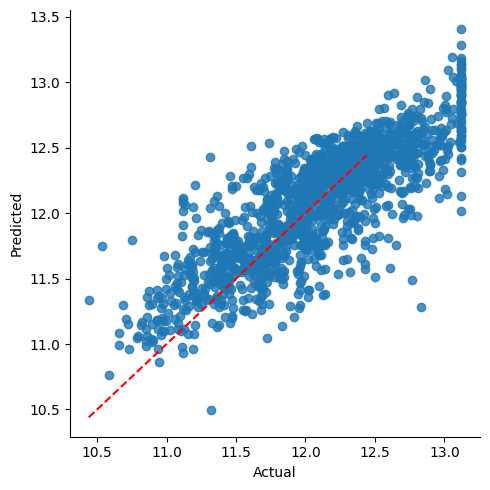

In [41]:
# Plot the actual vs predicted results
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plot the diagonal line 
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In my dataset, i can see that there is not a perfect relashionship. On the lower values our predictions are biased 

### Normality

We will test normality by checking with the quantile-quantile plot, Q-Q plot.

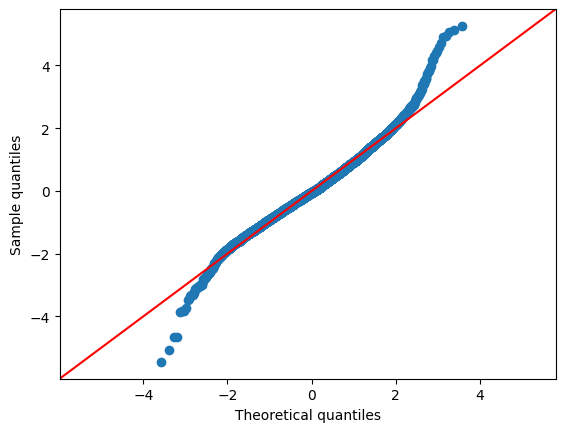

In [42]:
from statsmodels.graphics.gofplots import qqplot 

fig = qqplot(model.resid_pearson, line = '45', fit = 'True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

We can see that our model biasing

### Homoscedasticity

We will test homoscedasticity by plotting the residuals and checking if the variance is uniform.

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


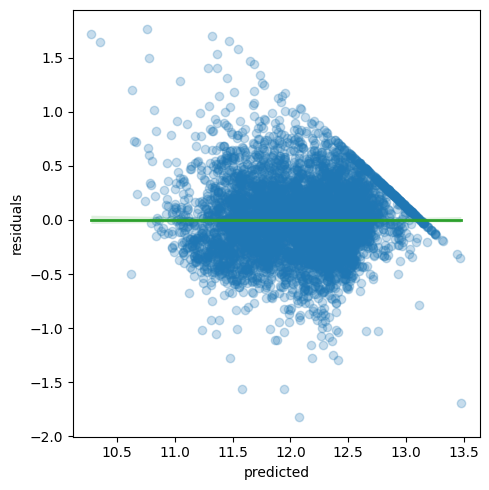

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(model.fittedvalues,model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
plt.tight_layout()
plt.show()

We can say that the distribution of our residuals is not completely uniform.

### No Autocorrelation

We will perform the Durbin-Watson test to determine if the no autocorrelation assumption holds.

In [44]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(model.resid)
print("Durbin-Watson:", durbinWatson)

Durbin-Watson: 1.9956010443948118


The Durbin-Watson statistic ranges between 0 and 4 : 
- A value of 2.0 means that there is no autocorrelation. 
- Values between 0 and 2 indicate positive 
- values between 2 and 4 indicate negative autocorrelation. 

In our case, Durbin-Watson statistic is very close to 2.0 therefore we can say that no autocorrelation assumption is not violated.

### No Multicolinearity

We will plot a heatmap to see the correlation between predictors visually and we will also calculate the variance inflation factor (VIF), which measures the multicollinearity among the independent variables.

In [45]:
mask = np.zeros_like(train_X.drop("const", axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_X.drop("const", axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")

<AxesSubplot:>

And we calculate VIF:

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(X.columns)):
    v=vif(np.matrix(X),i)
    print("Variance inflation factor for {}: {}".format(X.columns[i],round(v,2)))

Variance inflation factor for PC1: 1.0
Variance inflation factor for PC2: 1.0
Variance inflation factor for PC3: 1.0
Variance inflation factor for PC4: 1.0
Variance inflation factor for PC5: 1.0
Variance inflation factor for PC6: 1.0
Variance inflation factor for PC7: 1.0
Variance inflation factor for PC8: 1.0


Info : 
- A VIF of 1 indicates two variables are not correlated
- A VIF between 1 and 5 indicates a moderate correlation 
- And a VIF above 5 indicates a high correlation.

As result shows we have 5 high correlated and 2 moderately correlated variables. It is better if we get rid of some of them.

### BONUS: Outliers

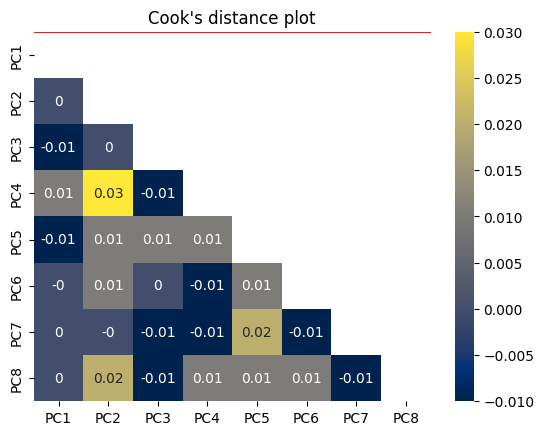

In [47]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(model)
(i, d) = inf.cooks_distance
plt.title("Cook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

From Cook’s plot, we can understand which are the observations we need to pay more attention to and decide whether to drop them or not. (As a rule, the observation has a high influence if the Cook’s distance is greater than 4/N-k-1 ( N=number of observations, k= number of predictors, yellow horizontal line in the plot)

### BONUS: Influence plot

Influence plots show the studentized residuals versus the leverage of each observation as measured by the hat matrix.

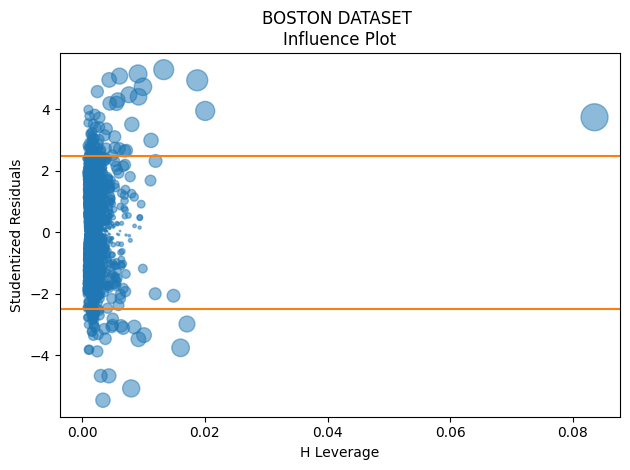

In [48]:
from statsmodels.stats.outliers_influence import OLSInfluence 
influence = OLSInfluence(model)
fig, ax = plt.subplots()
ax.axhline(-2.5, linestyle='-', color='C1')
ax.axhline(2.5, linestyle='-', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
 s=1000 * np.sqrt(influence.cooks_distance[0]),
 alpha=0.5)
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("BOSTON DATASET \nInfluence Plot")
plt.tight_layout()
plt.show()

In the dataset we can see that some data points have low leverage but large or low residuals. These highly influential data points need a delicate evaluation before including in the model.